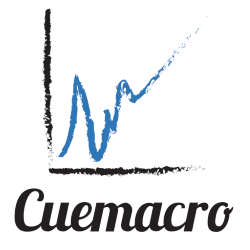

# Introducing tcapy and explaining TCA

**Saeed Amen / Founder of Cuemacro**

https://www.cuemacro.com / saeed@cuemacro.com / @saeedamenfx / All material is copyright Cuemacro / 2020

In this notebook we introduce tcapy, with many Python examples and the the concept of TCA. tcapy is an open source Python library, which is designed to do TCA (transaction cost analysis) for markets. At present it supports FX spot, but over time we hope to add other markets to it. At the most basic level, TCA involves taking market data which is used as a benchmark and then combining it with your own trading data. We can then compute metrics by comparing the market data with trade/order data. If you are interested in sponsoring the addition of new features and helping to contribute to tcapy please contact us.

## Why is TCA necessary?

There are several reasons why TCA is necessary for the buy side. The sell side might also wish to do TCA on their own trading activity and behalf of their clients. One reason is that regulations like MiFID II stipulate that buy side firms needs to show best execution. TCA can help to show best execution.

TCA can also save you money when trading. It can show which types of trading activity is costing you most enabling you to compare between factors which include, liquidity providers and methods of execution (such as algos).

## How can you do TCA?

There are several ways of doing TCA for your trading activity, which we describe below.

### Writing your own internal TCA library

This is very customisable, you can keep your trade data internal and you have access to the source code. Hence, possible to add your own metrics and benchmarks, which you might want to keep proprietary. But can be time consuming and expensive, not to just to develop, but also to maintain (the biggest cost). You're also reinventing the wheel, for something which has been done many times before.

### Using your liquidity provider's TCA
    
You can ask your liquidity provider to do TCA. This is easy! But it's difficult to customise and there might be a conflict of interest too. Also if every liquidity provider does their own TCA, it can be difficult to compare between them
    
### Use an external TCA vendor

This is independent. You can compare your performance versus your peers who also use the same service. But it's difficult to customise, given you don't have access to the source code. There's also a risk of vendor lock in too.

Or we can use an open source solution, like tcapy, which we describe next.

## Using open source tcapy to do TCA

Much of the complexity in TCA is due to the need to handle large tick datasets and do calculations on them and is largely a
software engineering problem. This work needs to be repeated in every single implementation. By open sourcing the library 
we hope that the industry will no longer need to keep reinventing the wheel when it comes to TCA. At the same time, 
because all the code is visible to users, tcapy allows you can add your own customized metrics and benchmarks, 
which is where you are likely have very particular IP in financial markets. You get the flexibility of a fully internal
TCA solution for free.

### Costs of TCA across the industry

Across the industry many financial firms and corporates trading within financial markets spend a lot of money on TCA, either
by developing in house tools or using external services. It is estimated that the typical buy side equities trading desk 
spends around 225k USD a year on TCA (see [MarketsMedia report](https://www.marketsmedia.com/tca-growth-fueled-regulators-investors/)). 

Many sell side firms and larger buy side firms build and maintain their own TCA libraries, which is very expensive. The cost of TCA across the industry is likely to run into many **hundreds of millions of dollars or possibly billions of dollars**. An open source solution would save millions!

### Complexity of TCA is the software engineering aspect

Much of the complexity in TCA is due to the need to handle large tick datasets and do calculations on them and is largely a
software engineering problem. This work needs to be repeated in every single implementation. By open sourcing the library 
we hope that the industry will no longer need to keep reinventing the wheel when it comes to TCA. At the same time, 
because all the code is visible to users, tcapy allows you can add your own customized metrics and benchmarks, 
which is where you are likely have very particular IP in financial markets. You get the flexibility of a fully internal
TCA solution for free. There are cases where you might wish to keep the metrics and benchmarks you use for TCA proprietary.

### When did tcapy start?

tcapy is one of the first open source libraries for TCA. You can run the library on your own hardware, so your trade/order
data can be kept private or it can be run on a cloud service like AWS. It has been in development since June 2017, originally for a large asset manager and was open sourced in March 2020.

### What technology does tcapy use?

tcapy is tested with Python 3.6 (Anaconda distribution) and uses a lot of the Python libraries you expect such as Pandas and NumPy. It also makes extensive use of Plotly for charts, and Dash/Flask for the web GUI. Depending on what database and Linux distribution you use, the whole tcapy stack can be open source.

We've tried to make tcapy to be vendor independent where possible, hence for example it supports:

* multiple database types for storing
market tick data (including Arctic/MongoDB, KDB and InfluxDB) and for trade/order data (including MySQL, PostgreSQL and 
Microsoft SQL Server).
* Linux (tested on Ubuntu and Red Hat), and Windows (although Windows Subsystem for Linux is required for full functionality)

tcapy has also been written to distribute the computation and make a lot of use of caching, using tools like Celery, Redis and Memcached to manage distributed computation. In the future, we are hoping to add features to make it easy to use serverless computing features on the cloud. Since you can see all the code, it also makes the TCA totally transparent. If you are doing TCA for regulatory reasons, it makes sense that the process should be fully open, rather than a black box.

## What do we define as trades and orders?

We assume that an order has a start and end time, and hence a duration. It will have fields associated with it such as the
ticker traded, the execution price, the account, the execution trader, the broker, the algo used etc.
 
Underneath every order, there might be a number of trades and other events. The difference is that we assume these trade
events, are points in time. These trades will tag their respective orders.

## Benchmark

What should we consider as our benchmark? We need to have market data which is representative of the market as our reference point to compare our own trades. If we consider the FX spot market there are relatively small number of principal liquidity providers (LPs). At any one time, you might observe different skew in prices from different market makers, because of a number of reasons, such as different forecasts on where spot could go, their own inventory etc. Hence, using the mid of the pricing stream from a single market maker, it may not be representative of the market on aggregate. We are using the mid price as a proxy for the reference price.

This liquidity is then recycled to the market through a number of sources such as agency brokers and also various trading venues. We've focused on Dukascopy here, mainly because it's free, to allow readers to run this code. However, you can try different data sources to see how it impacts your results.

At present tcapy has adapters to download market data from two data sources listed below to use as a benchmark. However, if you can feed whatever market data you want to the library and we hope to add more data sources in the future.
* Duksacopy - FX retail broker (free data) - note: doesn't have the past few weeks of data - our examples focus on this given it's free download
* New Change FX - data provider (paid data)

We've focused on Dukascopy in the notebook, to make the code easier to run in an open source environment. However, note that currently the direct downloader for Dukascopy is not thread-safe, so do not start it for multiple tickers etc. In practice, as we note later, it is much better to download tick data from an external source (such as Dukascopy) and then dump into a local database, before using for TCA. This saves us repeatedly downloading large amounts of data externally, which is likely to be slow.

Once you've decided which market data to use, you can calculate several benchmarks, which are below. Some benchmarks like TWAP are only appropriate for orders, which have a start and finish time. The abstract class `Benchmark` in tcapy can be extended to create your own customised benchmarks.
* Mid price (`BenchmarkMarketMid`)
* TWAP (`BenchmarkTWAP`)
* VWAP (`BenchmarkVWAP`)

In [Additional benchmarks and metrics]()

## Metrics

Metrics you might wish to calculate include the below, and we've indicated the classes which implement these. In tcapy, there is the abstract `Metric` class, which can be extended so you can write your own metrics.

* slippage - the difference between your benchmark and the executed price (`MetricSlippage`)
* market impact - the price move following a trade/order (`MetricTransientMarketImpact` and `MetricPersistentMarketImpact`)

We haven't implemented this yet, but you might also want to look at some flat fees, which are charged depending on the trading venue (although these are much easier to keep track of, as you don't need any market data to calculate, just your trade data).

## Aggregated statistics

As part of TCA, we'd then want to generate statistics based on the metrics like those listed below. An abstract class `ResultsForm` aggregates various statistics. You can extend it to create your own aggregations.
* average (`BarResultsForm`)
* PDF (`DistResultsForm`)
* outlier (`TableResultsForm`)

## Storage of trade/order and market data for tcapy

Your trade/order and market tick data can be stored internally in several ways for access by tcapy. The abstract class `DatabaseSource` can be extended to have customised sources (whether internal data sources or external data sources). You can also edit the below files, if you need to customise the database queries tcapy uses.

* CSV files for trade/order/market data (`DatabaseSourceCSVBinary`)
* DataFrames for trade/order/market data (`DatabaseSourceDataFrame`)
* MongoDB/Arctic, KDB or InfluxDB for market data (`DatabaseSourceArctic`, `DatabaseSourceKDB` and `DatabaseSourceInfluxDB`)
* Microsoft SQL Server, MySQL or PostgreSQL for trade/order data(`DatabaseSourceSQLServer`, `DatabaseSourceMySQL` or `DatabaseSourcePostgreSQL`)

You can also download market data directly from data providers as mentioned earlier, without accessing a database. In practice, if you do TCA often, you'll usually want to download the market data store the market data in a database rather than downloading each time. If you want to use other data providers not yet in tcapy, you can write your own downloaders. Many larger instituions already maintain their own market tick databases, and you might be able to hook into that.

Given that the computation is done internally, you can keep your trade/order data private.

# Offline computation versus on demand for TCA

tcapy has been written to provide computatation on demand. Hence, it loads market and trade/order data on the fly, and then conducts any calculations on that. Whilst it does cache the original market/trade/order data, it does not cache the results of computations by tcapy (eg. metrics like slippage or benchmarks like arrival price).

However, if you have a very large number of trades it might not be feasible to do this, without having access to a lot of hardware (or scaling the computation in the cloud), you might choose to run tcapy overnight and then save down the calculated fields to display later to users, eg. in its raw format (eg. CSV) or in a visual format such as PDF/HTML. Then users can bring up the results instantly, without having to wait.

# Maintaining market and trade/order databases

In order to have effective TCA, we obviously need to make sure that our data sources are properly maintained. If we have poor input data, unsurprisingly, we can't rely on the results. We list suggestions when it comes to dealing both with your own internal trade/order data and also for storage of market data, both of which you'll need to maintain if you wish to run tcapy.

* Here are some points to bear in mind for your trade/order databases
    * If they are very inaccurate, then we will not be able to ascertain a reasonable benchmark
    * Whilst persistent time offsets can be managed through the shifts of all timestamps (eg. on certain venues), we cannot easily do that if timestamps have a very random delay
    * We also need to make sure that all our trades are recorded, not some random subset, otherwise our trade sample might not be representative of our trading activity
    * Typically, electronically executed trades
    * If you want to do analysis at both the trade and order level, you need to make sure that trades have a pointer to their associated order
    
* For market data
    * Make sure it isn't plagued with gaps
    * When loading up data, eg. by daily chunks, tcapy will load up market data and all the trade/order data for that chunk
    * Then it will cut out any trade data which does not overlap with market data (given that we can't properly calculate metrics if there's no overlapping market data!)
    * This means if you have random gaps, particularly towards the start or end of the chunks, tcapy will ignore any trading activity in that period
        * Eg. let's say you have tcapy setup to use day chunks and your trades are between 0700-1700 UTC, but you are missing trade data between 0700-1000 UTC, tcapy will remove all the trades in that period from your analysis
        * Even if you use bigger chunks, say monthly chunks, tcapy will end up "filling down" spot values, which could result in inaccurate analysis and also differences in the output depending on the type of chunk size you use
        * An easy way to spot any problems in your market data, can be simply to plot and observe any gaps
        * We are working on some more automated solutions of identifying gaps in your market data

## Ways to access tcapy

There are three ways to conduct TCA with tcapy.

### Call the tcapy library directly from Python

To call the tcapy library directly, we need to create a `TCARequest` with appropriate parameters to conduct our TCA calculation. This will include parameters such as the `start_date` and `finish_date` of our computation, as well as which trade and market data to use. This is then given to the `TCAEngineImpl` class, which then returns a dictionary of DataFrames as the output. The focus of this notebook is how to call tcapy programmatically in a direct fashion, when tcapy is installed on your machine.


### Use the web GUIs

These are built on top of [Plotly's Dash](https://plot.ly/dash/), which is built on the lightweight Flask web server framework. To define your own web GUI, you can modify `app.py` to add it. You then need to extend several abstract classes
* `Layout` - to create a layout for the Dash application
* `TCACaller` - which converts handles the callback from the GUI inputs (like the dropdown boxes, buttons etc.) into a `TCARequest` object and interacts with `TCAEngineImpl` which is the entry point for the underlying computation.

The GUI uses `DisplayListeners` to handle callbacks to the outputs of the GUI (like the tables and plots), and `PlotRender` to generate the Plotly JSON necessary which can be rendered as charts.

There are two different GUIs at present

* `app.py` - has three different tabs, detailed TCA (trade/orders), aggregated TCA (trades) and compliance TCA (trades/orders)
    * `LayoutGen`
    * `TCACallerGen`
* `app_board.py` - allows the user to upload their trade data (in CSV format)
    * `LayoutBoard`
    * `TCACallerBoard`
    

### Use the RESTful API

At the current time, the RESTful API (`app_api.py`) is more of a proof of concept at this stage. The client makes a RESTful API call to the server.

Like the web GUI the server constructs a `TCARequest` object (although from inputs from the RESTful API call) to be processed by the `TCAEngineImpl`. It then returns the outputs of that calculation as a dictionary of DataFrames, which can be converted into JSON format. The client needs to convert this JSON back into a dictionary of DataFrames. The benefit of doing this is that we don't have the overhead of installing everything on the client side. All we have a lightweight Python installation, with libraries like pandas and plotly.

We are currently working on releasing a basic client for the RESTful API to interact with this, and also to make the RESTful API more functional.

# Calling tcapy programmatically

We assume that readers have already followed the [instructions](https://github.com/cuemacro/tcapy/blob/master/README.md) to install tcapy on their Linux machine (eg. Red Hat, Ubuntu or Windows/WSL/Ubuntu). This includes details on how to setup your Python environment (usually Anaconda) and lots of dependencies which need to be installed like the various databases and Redis (to cache data, and also to use as message broker with Celery).

To run the code in this notebook, we assume that:
* the database/caching dependencies have been started using `restart_db.sh` (or we have databases running elsewhere we have configured tcapy to use) 
* Celery has been started by running `restart_tcapy.sh`, which is a distributed task manager (again as with the databases, you can have Celery workers running on another machine, you just need to make sure that the Celery workers and client reference the same message broker instance - typically Redis - and result backend - typically Memcached)

## Benchmark machine

For reference, the benchmark times quoted in the text are for the following hardware setup, which is designed to replicate a typical environment, where databases are running on a different system. In our case, we are running on Windows and WSL/Ubuntu on our primary machine. This setup is the best of both worlds, allowing us to use features like Celery and Dash/web GUI undex Linux, but still using Windows, is it also possible to interact with applications like Excel easily (we will be creating an Excel wrapper for tcapy using xlwing soon!). Note, that the times we quote are from running once (in practice, we should take an average over many runs).

tcapy and MongoDB 4.2.3 Community Edition running on:
* Processor: Intel(R) Core(TM) i9-7940X CPU @ 3.10GHz, 14 Core(s)
* Memory: 64 GB RAM
* Hard disk: NVMe m.2 SSD
* OS: Windows Version 10.0.18362 running tcapy front end/Jupyter notebook
* WSL/Windows Subsystem for Linux (Ubuntu 18.04) running Celery/Redis/Memcached backend, MySQL 8 and MongoDB 4.2.3 Community Edition (running via Docker containers)

We are also planning to run benchmarks on a slower machine in the future:
* Intel(R) Xeon(R) CPU E3-1505M v6 @ 3.00GHz, 4 Core(s)
* Memory: 32 GB RAM and 
* Hard disk: NVMe m.2 SSD
* OS: Windows Version 10.0.17763

Our first step is to add the tcapy library to our `PYTHONPATH`. You may need to change these lines. Note, that in our setup, we are running the Jupyter notebook on Windows, and the backend Celery workers on Linux. If you are running everything in the same environment, the paths are likely to be same. We'll also define some paths for the test data we'll use for trade/orders.

In [1]:
import sys
import os

windows_tcapy_path = 'e:/cuemacro/tcapy' # Windows platform
linux_tcapy_path = '/home/tcapyuser/cuemacro/tcapy' # Linux platform
local_test_data_path = '../test/resources/' # Windows platform
remote_test_data_path = '../test/resources/' # WSL drive
template_folder_path = '../tcapy/vis/report/templates/'

# Assuming the front end is on Windows
sys.path.insert(0, windows_tcapy_path)

If the Python path now includes tcapy, we can do all the imports from it, that we'll need later. We'll also import all the other Python libraries we'll use.

In [2]:
from collections import OrderedDict

# This is the entry point for our TCA analysis
from tcapy.analysis.tcaengine import TCAEngineImpl

# To construct the parameters for our TCA calculation
from tcapy.analysis.tcarequest import TCARequest

# To access trade and market data
from tcapy.data.databasesource import DatabaseSourceCSVBinary, \
    DatabaseSourceDataFrame, DatabaseSourceDukascopy

# Import all the metrics and benchmarks we'll use
from tcapy.analysis.algos.benchmark import BenchmarkArrival, BenchmarkMarketSpreadToMid
from tcapy.analysis.algos.metric import MetricSlippage, MetricTransientMarketImpact

# To aggregate the TCA results
from tcapy.analysis.algos.resultsform import TimelineResultsForm, DistResultsForm, BarResultsForm

# To help display the output of a TCA calculation
from tcapy.vis.tcaresults import TCAResults
from tcapy.vis.report.computationreport import JinjaRenderer
from tcapy.vis.report.tcareport import TCAReport
from tcapy.vis.displaylisteners import PlotRender

# General classes
from tcapy.conf.constants import Constants
from tcapy.util.mediator import Mediator

# Prevent requests from displaying debug messages for certain libraries
import logging

logging.getLogger("findatapy").setLevel(logging.WARNING)
logging.getLogger("requests").setLevel(logging.WARNING)
logging.getLogger("urllib3").setLevel(logging.WARNING)

# For plotting later
import plotly.io as pio

# For interactive plots (but these disappear when we reopen Jupyter)
pio.renderers.default = "notebook" 

# Using https://github.com/plotly/Kaleido to generate static plot images
# pio.renderers.default = "svg"
pio.renderers.default = "png" 

import plotly

from chartpy import Chart, Style

# default size for Plotly charts we use
chart_width = 800
chart_height = 500

chart = Chart()
constants = Constants()
style = Style(width=chart_width, height=chart_height, scale_factor=-1, silent_display=True)

C:\Anaconda3\envs\py37tca\lib\site-packages\arctic\store\_pandas_ndarray_store.py:6: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import DataFrame, Series, Panel


## Format of trade/order data for tcapy and DatabaseSource

tcapy has a test dataset of randomised trade/order data in CSV format, which we'll use later. We have generated these by taking market bid/ask data and then randomly perturbing the bid/ask for sells/buys respectively. Random sizes and directions have also been constructed. If you want to create your own randomized data you can use `DataTestCreator`. I'd suggest it's probably better to try using your own real trade data, as the output will be more 'realistic'. A lot of the output we'll get might end up looking artifical because of the simple assumptions we've made in the construction of the test data.

In [3]:
# The test trade/order data is populated between 25 Apr 2017-05 Jun 2017
# with trades/orders for 'EURUSD', 'USDJPY' and 'EURJPY'
local_csv_trade_order_mapping = OrderedDict([('trade_df', os.path.join(local_test_data_path, 'small_test_trade_df.csv')),
                                             ('order_df', os.path.join(local_test_data_path, 'small_test_order_df.csv'))])

remote_csv_trade_order_mapping = OrderedDict([('trade_df', os.path.join(remote_test_data_path, 'small_test_trade_df.csv')),
                                              ('order_df', os.path.join(remote_test_data_path, 'small_test_order_df.csv'))])

### Directly download data from Dukascopy

The `DatabaseSource` abstract class is extended to provide trade and market data access from internal sources (eg. CSV, Arctic/MongoDB), as well as external sources like Dukascopy. We demonsrate how to use `DatabaseSourceDukascopy` to download market data with quoted bid/ask from Dukascopy (we can't download trade data from that). If there are any timeouts in the external download, `findatapy` displays a warning, and will also retry the download.

In [4]:
%%time

database_source_dukascopy = DatabaseSourceDukascopy()

market_df = database_source_dukascopy.fetch_market_data(
    ticker='EURUSD', start_date='25 Apr 2017', finish_date='28 Apr 2017')#finish_date='05 Jun 2017')

2020-09-15 13:40:24,443; DEBUG:tcapy.data.databasesource: Downloading 2017-04-25 00:00:00 - 2017-04-28 00:00:00 for EURUSD (databasesource.py:3816)
2020-09-15 13:40:24,468; DEBUG:asyncio: Using selector: SelectSelector (selector_events.py:58)


Wall time: 5.39 s


We can look at the market data downloaded to see the format.

In [5]:
market_df.head(10)

,bid,ask,mid,ticker
Date,,,,
2017-04-25 00:00:01.466000+00:00,1.08648,1.08654,1.086510,EURUSD
2017-04-25 00:00:01.618000+00:00,1.08650,1.08654,1.086520,EURUSD
2017-04-25 00:00:02.276000+00:00,1.08650,1.08654,1.086520,EURUSD
2017-04-25 00:00:04.081000+00:00,1.08649,1.08654,1.086515,EURUSD
2017-04-25 00:00:05.470000+00:00,1.08650,1.08654,1.086520,EURUSD
2017-04-25 00:00:06.039000+00:00,1.08650,1.08654,1.086520,EURUSD
2017-04-25 00:00:06.567000+00:00,1.08651,1.08654,1.086525,EURUSD
2017-04-25 00:00:07.604000+00:00,1.08652,1.08655,1.086535,EURUSD
2017-04-25 00:00:08.503000+00:00,1.08654,1.08656,1.086550,EURUSD


### Directly loading trade/order data from CSV

We can use `DatabaseSourceCSVBinary` to open up the trade and order data.

In [6]:
trade_df = DatabaseSourceCSVBinary(trade_data_database_csv=local_csv_trade_order_mapping['trade_df']) \
    .fetch_trade_order_data()

order_df = DatabaseSourceCSVBinary(trade_data_database_csv=local_csv_trade_order_mapping['order_df']) \
    .fetch_trade_order_data()

### Exploring trade/order data

Let's look at the trade data so we can understand the type of format that tcapy needs. We can see that each trade is a point in time. In some cases, these are actual `trade` events, other times they are `placement`, `cancel` or `cancel/replace` messages. The times of two different events can be identical, and there are some instances of this in the test datasets of trade/orders. Note, that this can often cause problems with Pandas, so if do create your own `Metric` and `Benchmark` variations, do check that your implementations can manage it (can require some rewriting of the code).

In [7]:
trade_df.head(5)

,account_id,algo_id,algo_settings,ancestor_pointer_id,broker_id,broker_sub_id,event_type,executed_notional,executed_price,id,...,market_mid,notional_currency,order_notional,portfolio_id,portfolio_manager_id,price_limit,side,ticker,trader_id,venue
Date,,,,,,,,,,,,,,,,,,,,,
2017-04-25 07:09:31.804000+00:00,account3,algo4,default,order_EURUSD2017-04-25 07:09:31.804000+00:00_2...,broker5,subbroker1,placement,0,0.000000,execution_EURUSD2017-04-25 07:09:31.804000+00:...,...,1.087965,EUR,18517881,portfolio4,pm2,1.087965,-1,EURUSD,trader1,venue4
2017-04-25 07:09:33.765000+00:00,account3,algo4,default,order_EURUSD2017-04-25 07:09:31.804000+00:00_2...,broker5,subbroker1,trade,18517881,1.087965,execution_EURUSD2017-04-25 07:09:33.765000+00:...,...,1.087990,EUR,18517881,portfolio4,pm2,1.087965,-1,EURUSD,trader1,venue3
2017-04-25 11:09:52.384000+00:00,account3,algo6,default,order_EURUSD2017-04-25 11:09:52.384000+00:00_2...,broker6,subbroker6,placement,0,0.000000,execution_EURUSD2017-04-25 11:09:52.384000+00:...,...,1.088090,EUR,8364696,portfolio4,pm3,1.088090,-1,EURUSD,trader5,venue4
2017-04-25 11:09:53.242000+00:00,account3,algo6,default,order_EURUSD2017-04-25 11:09:52.384000+00:00_2...,broker6,subbroker6,cancel/replace,0,0.000000,execution_EURUSD2017-04-25 11:09:53.242000+00:...,...,1.088080,EUR,0,portfolio4,pm3,1.088090,-1,EURUSD,trader5,venue3
2017-04-25 11:10:20.251000+00:00,account3,algo6,default,order_EURUSD2017-04-25 11:09:52.384000+00:00_2...,broker6,subbroker6,trade,8364696,1.088093,execution_EURUSD2017-04-25 11:10:20.251000+00:...,...,1.088125,EUR,8364696,portfolio4,pm3,1.088090,-1,EURUSD,trader5,venue4


Let's print out all the fields. Some fields are compulsory for use in tcapy, including the index (`Date`), `ticker`, `side` etc. Some fields here are optional such as `market_ask`, `market_bid` and `market_mid`. Similar fields will be autogenerated from the market data and appends to the trade data. `DatabaseSource` does minimal changes to the format of the data. Internally, there's a higher level class `DataNorm` that can be edited to convert the field names to the ones which tcapy expects. Each of these trade message point to the order which they belong to. There can be multiple trade messages within a single order.

In [8]:
trade_df.columns

Index(['account_id', 'algo_id', 'algo_settings', 'ancestor_pointer_id',
       'broker_id', 'broker_sub_id', 'event_type', 'executed_notional',
       'executed_price', 'id', 'market_ask', 'market_bid', 'market_mid',
       'notional_currency', 'order_notional', 'portfolio_id',
       'portfolio_manager_id', 'price_limit', 'side', 'ticker', 'trader_id',
       'venue'],
      dtype='object')

If we look at the order data, one the key differences, which we noted is that each order has a `benchmark_date_start` and `benchmark_date_end`, a start and end time. Note, obviously this randomized data. We also see that it doesn't have columns for `executed_notional` data or `executed_price` data. tcapy can generate this from the underlying trade fills from the earlier table.

In [9]:
order_df.head(5)

,account_id,algo_id,algo_settings,arrival_price,benchmark_date_end,benchmark_date_start,broker_id,broker_sub_id,id,notional,notional_currency,portfolio_id,portfolio_manager_id,price_limit,side,ticker,trader_id
Date,,,,,,,,,,,,,,,,,
2017-04-25 07:09:31.804000+00:00,account3,algo4,default,1.087965,2017-04-25 10:40:16.512000+00:00,2017-04-25 07:09:31.804000+00:00,broker5,subbroker1,order_EURUSD2017-04-25 07:09:31.804000+00:00_2...,18517881,EUR,portfolio4,pm2,1.087965,-1,EURUSD,trader1
2017-04-25 11:09:52.384000+00:00,account3,algo6,default,1.088090,2017-04-25 14:33:06.745000+00:00,2017-04-25 11:09:52.384000+00:00,broker6,subbroker6,order_EURUSD2017-04-25 11:09:52.384000+00:00_2...,8364696,EUR,portfolio4,pm3,1.088090,-1,EURUSD,trader5
2017-04-25 15:50:41.479000+00:00,account1,algo3,default,1.093765,2017-04-26 06:01:27.935000+00:00,2017-04-25 15:50:41.479000+00:00,broker5,subbroker5,order_EURUSD2017-04-25 15:50:41.479000+00:00_2...,774423,EUR,portfolio1,pm6,1.093765,-1,EURUSD,trader3
2017-04-26 06:48:48.562000+00:00,account4,algo2,default,1.092460,2017-04-26 09:57:57.631000+00:00,2017-04-26 06:48:48.562000+00:00,broker3,subbroker3,order_EURUSD2017-04-26 06:48:48.562000+00:00_2...,16465763,EUR,portfolio3,pm5,1.092460,-1,EURUSD,trader5
2017-04-26 11:15:50.864000+00:00,account6,algo1,default,1.089585,2017-04-26 14:41:01.382000+00:00,2017-04-26 11:15:50.864000+00:00,broker3,subbroker6,order_EURUSD2017-04-26 11:15:50.864000+00:00_2...,11501881,EUR,portfolio4,pm3,1.089585,-1,EURUSD,trader4


tcapy can do TCA on trade data on its own (or trade and order data together). Make sure that your trade/order is in a similar format to use with tcapy.

## TCA computations using external data download

We first need to create a trade/order mapping, to tell tcapy where to find the trade/order data, which is this case is in CSV files. Note the use of `trade_df` and `order_df`, which you'll have to use each time.

We could use an `OrderedDict` (as earlier), but for Python 3.6+ all dictionaries have ordering built in, so we'll just a `dict` given we are assuming that users have set up a Python 3.6 environment for tcapy, in line with the installation instructions.

In [6]:
csv_trade_order_mapping = {'trade_df' : os.path.join(local_test_data_path, 'small_test_trade_df.csv'),
                           'order_df' : os.path.join(local_test_data_path, 'small_test_order_df.csv')}

We create a `TCAEngineImpl` object which will be used to accept a `TCARequest` for doing the TCA computation. We also get reference to the `VolatileCache` which uses Redis underneath.

In [7]:
tca_version  = constants.tcapy_version
tca_engine = TCAEngineImpl(version=tca_version)

volatile_cache = Mediator.get_volatile_cache()

2020-09-15 14:43:22,140; INFO:tcapy.analysis.tcaengine: Init TCAEngine version: pro - Env: desktop_laptop_linux (tcaengine.py:53)


We create a `TCARequest`, which will be run on our trade/order CSV files. It allows us to specify our `TCARequest` in a Pythonic like way, as opposed to using some sort of query language directly (like SQL or q). Obviously, the key advantage of this is because tcapy supports all sorts of databases, we don't need to change our `TCARequest` much if we change our underlying data sources.

The market data will be externally downloaded from Dukascopy. In this instance, we have set `use_multithreading=False` which avoids the use of Celery. In production though we'd recommend setting it to `True` to speed up computation significantly. We can add the below, for calculation:

* `Metric` to measure the "quality" of each trade/order
    * We've added `MetricSlippage` which by default calcualtes the difference between the `mid` price and the `executed_price`
* `Benchmark` to capture what the market is around each trade/order
    * We've added `BenchmarkArrival` which will the mid price for the arrival price of every trade/order
* `ResultForm` objects to aggregate the statistics of various fields. 
    * We've added `TimelineResultsForm` will calculate the average `slippage` by day and hour. We use a `scalar` of `10000.0` to convert the values into basis points, which are easier to interpret
    * By default the slippage will be weighted by the `executed_notional` although we can change the weighting field
    
Whilst we are asking for ticker `EURUSD`, tcapy will also search for trades/orders booked the "wrong" way round ie. `USDEUR` and normalize them so they are converted to `EURUSD` trades/orders.

In [8]:
# We are conducting a TCA computation for trade/order data between 05 May-10 May 2017 for EURUSD
# The trade dataset is from CSV and the market data is downloaded from Dukascopy on the fly
# For metrics, we are calculating slippage and for benchmarks we are adding a field for the arrival price
# We are creating a timeline of average slippage by date and hour
tca_request = TCARequest(start_date='05 May 2017', finish_date='10 May 2017', ticker=['EURUSD'],
                         tca_type='detailed',
                         trade_data_store='csv', market_data_store='dukascopy',
                         trade_order_mapping=local_csv_trade_order_mapping,
                         metric_calcs=[MetricSlippage()],
                         results_form=[TimelineResultsForm(metric_name='slippage', 
                                                           by_date='datehour', scalar=10000.0)],
                         benchmark_calcs=[BenchmarkArrival(), 
                                          BenchmarkMarketSpreadToMid()],
                         use_multithreading=False)

Notice there a lot of the log output can be suppressed if we change the logging level to `INFO` in `constants.py`. Most of the output is related to the downloading of Dukascopy data. Depending on how the caching is setup, tcapy may try to download market data in month/week/day chunks and cache them.

To force deletion of the cache you can run the `clear_cache()` command. Basically underneath `calculate_tca` will use several other classes. We describe the rough steps of the calculation before:
* `TCAMarketTradeLoaderImpl` manages the computation
* A different instance `TCATickerLoaderImpl` for each ticker (and often in parallel if `use_multithreading=True` and Celery is running) will then
    * load the market, trade and order data (using `DataFactory`, `DatabaseSource` etc.)
    * calculate all the metrics and benchmarks (using `Metric`, `Benchmark` etc.)
* `TCAMarketTradeLoaderImpl` will then aggregate the statistics generated (using `ResultsForm`)
* dictonary of (mostly) `DataFrame` objects returned to the caller by `calculate_tca`

As we noted before if there are any timeouts in downloading the data, it will attempt to retry a few times.

In [13]:
%%time

volatile_cache.clear_cache()

# Dictionary of (mostly) dataframes as output from TCA calculation
dict_of_df = tca_engine.calculate_tca(tca_request)

2020-09-15 13:40:29,910; DEBUG:tcapy.analysis.tcamarkettradeloader: Start loading trade/data/computation (tcamarkettradeloader.py:241)
2020-09-15 13:40:29,913; DEBUG:tcapy.analysis.tcatickerloaderimpl: Get market and trade/order data for EURUSD from 2017-05-05 00:00:00+00:00 - 2017-05-10 00:00:00+00:00 (tcatickerloaderimpl.py:80)
2020-09-15 13:40:29,915; DEBUG:tcapy.data.volatilecache: Attempting to get list from cache: ['dukascopy_EURUSD_2017-05-05 00:00:00+00:00_2017-05-10 00:00:00+00:00_market_df_None_comp'] (volatilecache.py:540)
2020-09-15 13:40:29,918; DEBUG:tcapy.data.volatilecache: Attempting to get list from cache: ['dukascopy_EURUSD_2017-05-05 00:00:00+00:00_2017-05-10 00:00:00+00:00_market_df_None_comp'] (volatilecache.py:540)
2020-09-15 13:40:29,922; DEBUG:tcapy.data.databasesource: Downloading 2017-05-05 00:00:00 - 2017-05-10 00:00:00 for EURUSD (databasesource.py:3816)
2020-09-15 13:40:38,107; WARNING:tcapy.analysis.algos.benchmark: mid not in market data (benchmark.py:90

Wall time: 8.95 s


### Impact of caching market data

The step which involves loading market/trade/order data tends to be slow and IO intensive, hence parallelisation of it can speed it up a lot (which we'll see later). Generally, it tends to be quicker to cut up our database calls into smaller date chunks, and do them in parallel, rather than downloading a massive chunk.

By caching these datasets in-memory with Redis, we can avoiding constantly hammering our data source (whether that's external, which is very slow or internal, like a database). Here the computation takes 10 seconds.

In [14]:
%%time
volatile_cache.clear_cache()

# Dictionary of (mostly) dataframes as output from TCA calculation
dict_of_df = tca_engine.calculate_tca(tca_request)

2020-09-15 13:40:38,870; INFO:tcapy.analysis.tcaengine: More than 1 ticker specified for TCA detailed computation. Only working on first (tcaengine.py:122)
2020-09-15 13:40:38,871; DEBUG:tcapy.analysis.tcamarkettradeloader: Start loading trade/data/computation (tcamarkettradeloader.py:241)
2020-09-15 13:40:38,872; DEBUG:tcapy.analysis.tcatickerloaderimpl: Get market and trade/order data for EURUSD from 2017-05-05 00:00:00+00:00 - 2017-05-10 00:00:00+00:00 (tcatickerloaderimpl.py:80)
2020-09-15 13:40:38,873; DEBUG:tcapy.data.volatilecache: Attempting to get list from cache: ['dukascopy_EURUSD_2017-05-05 00:00:00+00:00_2017-05-10 00:00:00+00:00_market_df_None_comp'] (volatilecache.py:540)
2020-09-15 13:40:38,875; DEBUG:tcapy.data.volatilecache: Attempting to get list from cache: ['dukascopy_EURUSD_2017-05-05 00:00:00+00:00_2017-05-10 00:00:00+00:00_market_df_None_comp'] (volatilecache.py:540)
2020-09-15 13:40:38,877; DEBUG:tcapy.data.databasesource: Downloading 2017-05-05 00:00:00 - 2017

Wall time: 8.89 s


If caching it enabled, and we run it again, we see the computation only takes around 1 seconds. This contrasts to about 10 seconds the first time around.

In [15]:
%%time

# Dictionary of (mostly) dataframes as output from TCA calculation
dict_of_df = tca_engine.calculate_tca(tca_request)

2020-09-15 13:40:47,773; INFO:tcapy.analysis.tcaengine: More than 1 ticker specified for TCA detailed computation. Only working on first (tcaengine.py:122)
2020-09-15 13:40:47,774; DEBUG:tcapy.analysis.tcamarkettradeloader: Start loading trade/data/computation (tcamarkettradeloader.py:241)
2020-09-15 13:40:47,775; DEBUG:tcapy.analysis.tcatickerloaderimpl: Get market and trade/order data for EURUSD from 2017-05-05 00:00:00+00:00 - 2017-05-10 00:00:00+00:00 (tcatickerloaderimpl.py:80)
2020-09-15 13:40:47,776; DEBUG:tcapy.data.volatilecache: Attempting to get list from cache: ['dukascopy_EURUSD_2017-05-05 00:00:00+00:00_2017-05-10 00:00:00+00:00_market_df_None_comp'] (volatilecache.py:540)
2020-09-15 13:40:47,824; DEBUG:tcapy.analysis.tcatickerloader: Get trade order holder for EURUSD from 2017-05-05 00:00:00+00:00 - 2017-05-10 00:00:00+00:00 (tcatickerloader.py:386)
2020-09-15 13:40:47,859; WARNING:tcapy.data.datafactory: Dataframe empty for ticker USDEUR (datafactory.py:97)
2020-09-15 1

Wall time: 450 ms


### Interpreting the TCA computation output

Let's take a look at the dictionary returned.

In [16]:
dict_of_df.keys()

odict_keys(['trade_df', 'order_df', 'sparse_market_trade_df', 'sparse_market_order_df', 'market_df_downsampled', 'candlestick_fig', 'timeline_trade_df_slippage_by/mean_datehour/all', 'timeline_order_df_slippage_by/mean_datehour/all', 'market_df'])

We explain what each item in the dictionary is below:

* for further analysis
    * `trade_df` - DataFrame of trades (with added calculated fields like slippage, arrival price etc.)
    * `order_df` - DataFrame of orders (with added calculated fields like slippage, arrival price etc.)
* for plotting
    * `sparse_market_trade_df` - DataFrame with market data and trades
    * `sparse_market_order_df` - DataFrame with market data and orders
    * `market_df_downsampled` - DataFrame with downsampled market data
    * `candlestick_fig` - Plotly JSON of the market data as candlesticks
* aggregated data
    * `timeline_trade_df_slippage_by/mean_date/all` - a timeline of the slippage for the trades
    * `timeline_order_df_slippage_by/mean_date/all` - a timeline of the slippage for the orders

We can plot the timeline of the slippage by day and hour. During this period the slippage has been between 0.2 and 0.05 basis points (bp), which seems reasonable for EUR/USD.

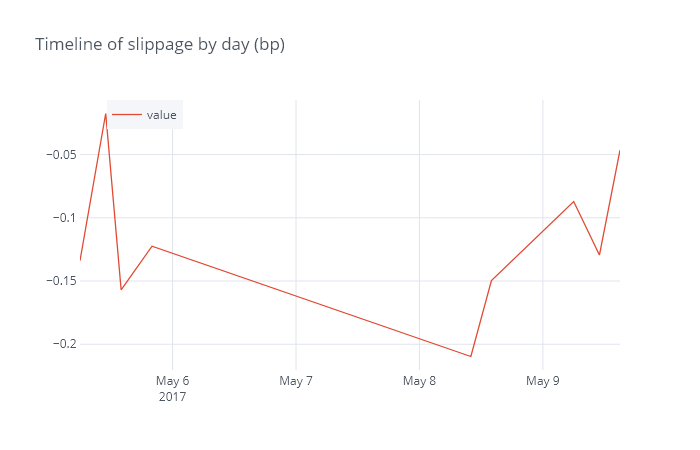

In [17]:
style.title = 'Timeline of slippage by day (bp)'
chart.plot(dict_of_df['timeline_trade_df_slippage_by/mean_datehour/all'], engine='plotly', style=style)

### Explaining output of tcapy calculation in trade/order DataFrames

Let's also take a look at the returned `trade_df` DataFrame. Most of the fields are the same, but there now additional fields fields calculated by tcapy. Note, these will vary depending on which `Metric` and `Benchmark` objects you specify in the `TCARequest`:
* `arrival` - arrival price from the benchmark at time of the order/just before
* `slippage_benchmark` - difference between mid price from the market data, just before/at trade
* `spread_to_benchmark` - differnce to the bid (for sells) and to the ask (for buys) - if this data is available
* `slippage` - difference between `executed_price` and benchmark
* `slippage_anomalous` - 1 if the slippage is beyond a certain 

We also have fields for the notional in reporting currency (here `USD`) which are autogenerated from the market data combined with the trade data. You can specify you own reporting currency in `Constants`. It is useful to have this field, if you want to calculate total trading costs across many different currency pairs later.

### Using TCAResults class

We can use a higher level `TCAResults` object to simplify the output of the TCA calculation. Here we create the Plotly JSON for all the charts which have been requested.

In [18]:
tca_results = TCAResults(dict_of_df, tca_request, chart_width=chart_width, chart_height=chart_height)
tca_results.render_computation_charts()

2020-09-15 13:40:51,101; DEBUG:tcapy.vis.displaylisteners: Plotting main timeline 2583 (displaylisteners.py:988)
2020-09-15 13:40:51,147; DEBUG:tcapy.vis.displaylisteners: Rendered plot 2583 and  (displaylisteners.py:998)
2020-09-15 13:40:51,150; DEBUG:tcapy.vis.displaylisteners: Plotting main timeline 2576 (displaylisteners.py:988)
2020-09-15 13:40:51,196; DEBUG:tcapy.vis.displaylisteners: Rendered plot 2576 and  (displaylisteners.py:998)


Let's get the trade data from the `TCAResults` objects.

In [19]:
tca_results.trade_order['trade_df'].head(5)

,account_id,algo_id,algo_settings,ancestor_pointer_id,broker_id,broker_sub_id,event_type,executed_notional,executed_price,id,...,notional_reporting_currency_mid,reporting_currency,executed_notional_in_reporting_currency,order_notional_in_reporting_currency,notional,arrival,slippage_benchmark,spread_to_benchmark,slippage,slippage_anomalous
Date,,,,,,,,,,,,,,,,,,,,,
2017-05-05 06:27:26.514000+00:00,account5,algo2,default,order_EURUSD2017-05-05 06:26:47.189000+00:00_2...,broker6,subbroker1,trade,18008368,1.097430,execution_EURUSD2017-05-05 06:27:26.514000+00:...,...,1.097445,USD,1.976319e+07,1.976319e+07,18008368,1.097445,1.097445,-0.000005,-0.000013,1
2017-05-05 11:30:00.791000+00:00,account5,algo3,default,order_EURUSD2017-05-05 11:28:43.816000+00:00_2...,broker3,subbroker3,trade,5370024,1.095723,execution_EURUSD2017-05-05 11:30:00.791000+00:...,...,1.095725,USD,5.884070e+06,5.884070e+06,5370024,1.095725,1.095725,-0.000014,-0.000002,0
2017-05-05 14:56:49.373000+00:00,account4,algo2,default,order_EURUSD2017-05-05 14:56:33.125000+00:00_2...,broker2,subbroker5,trade,6198753,1.098892,execution_EURUSD2017-05-05 14:56:49.373000+00:...,...,1.098875,USD,6.811655e+06,6.811655e+06,6198753,1.098875,1.098875,-0.000014,-0.000016,1
2017-05-05 20:33:21.932000+00:00,account6,algo2,default,order_EURUSD2017-05-05 20:33:14.677000+00:00_2...,broker5,subbroker6,trade,6270424,1.099439,execution_EURUSD2017-05-05 20:33:21.932000+00:...,...,1.099425,USD,6.893861e+06,6.893861e+06,6270424,1.099425,1.099425,-0.000023,-0.000012,0
2017-05-08 10:31:33.011000+00:00,account1,algo3,default,order_EURUSD2017-05-08 10:30:57.526000+00:00_2...,broker4,subbroker2,trade,3276653,1.094703,execution_EURUSD2017-05-08 10:31:33.011000+00:...,...,1.094680,USD,3.586887e+06,3.586887e+06,3276653,1.094680,1.094680,-0.000009,-0.000021,1


We can access the timeline of the slippage for trades by accessing the `timeline` property. Note, it won't be populated for date/hours where we haven't traded.

In [20]:
tca_results.timeline['trade_df_slippage_by/mean_datehour/all'].head(5)

,value
Date,
2017-05-05 06:00:00,-0.133895
2017-05-05 11:00:00,-0.017519
2017-05-05 14:00:00,-0.156906
2017-05-05 20:00:00,-0.122419
2017-05-08 10:00:00,-0.209665


### Using TCAReport class

We can also render the various charts into an HTML page using TCAReport (or PDF via plotly-orca, which converts the HTML file to PDF, although this hasn't been fully tested yet). You can see the HTML output [here](test.htm). You can extend `TCAReport` to create your own report designs. There are two implementations at present
* `JinjaRenderer` uses Jinja and HTML templates and WeasyPrint to convert to PDFs
    * This is a very powerful technique and is the default option
* `BasicRenderer` uses chartpy underneath and pdfkit (wkhtmltopdf) to convert to PDFs
    * This produces simpler looking outout

In [21]:
tca_report = TCAReport(tca_results, renderer=JinjaRenderer(template_folder=template_folder_path))

html_code = tca_report.create_report(output_filename='test.htm', output_format='html');

The method also returns the HTML to the user, if they want to display it (maybe to a website, as an inline HTML page?)

In [22]:
html_code[0:500]

'<!doctype html>\n<html>\n  <head>\n    <meta charset="utf-8">\n    <link href="clean_report.css" rel="stylesheet">\n    <style type="text/css">\n    @charset "UTF-8";\n@import url(https://fonts.googleapis.com/css?family=Open+Sans);\n\n/*@font-face {*/\n/*  font-family: Open Sans;*/\n/*  font-weight: 400;*/\n/*  src: url(OpenSans-Regular.ttf); }*/\n\n/*@font-face {*/\n/*  font-family: Open Sans;*/\n/*  font-style: italic;*/\n/*  font-weight: 400;*/\n/*  src: url(OpenSans-Italic.ttf); }*/\n\n/*@font-face {*/\n/*  font'

Let's also publish as PDF! Note, this will need some additional dependencies, given it uses WeasyPrint.

In [23]:
try:
    tca_report.create_report(output_filename='test.pdf', output_format='pdf');
except:
    pass

2020-09-15 13:40:51,903; ERROR:weasyprint: Relative URI reference without a base URI: <link href="clean_report.css"> (urls.py:145)


### Distribution of slippage and average slippage

Here we create a `TCARequest` for the same dataset. This time, however, we also calculate the `MetricTransientMarketImpact`, which we've defined as the 5 second move from a trade or start of an order. We also want to calculate the distribution of the slippage by side (ie. buy/sell) with `DistResultsForm` and to calculate the average slippage (weighted by the executed notional) with `BarResultForm`. Note, we've used `scalar` parameters of `10000.0` to convert to basis point to ease understanding.

All these `Metric` and `ResultsForm` calculations will be calculated on both trades and orders. However, we can specify for it to be calculated only on for example trades, by instantiating the objects using the `market_trade_order_list` parameter eg. `MetricSlippage(market_trade_order_list=['trade_df'])`

In [24]:
tca_request = TCARequest(start_date='05 May 2017', finish_date='10 May 2017', ticker='EURUSD',
    tca_type='detailed',
    trade_data_store='csv', market_data_store='dukascopy',
    trade_order_mapping=csv_trade_order_mapping,
    metric_calcs=[MetricSlippage(), 
        MetricTransientMarketImpact(
                             transient_market_impact_gap={'5' : 's'})],
    results_form=[DistResultsForm(metric_name='slippage', 
                  aggregate_by_field='side', scalar=10000.0),
        BarResultsForm(metric_name='slippage', 
            aggregate_by_field='ticker', scalar=10000.0),
        BarResultsForm(metric_name='slippage', 
            aggregate_by_field='broker_id', scalar=10000.0)],
    benchmark_calcs=[BenchmarkMarketSpreadToMid()],
    use_multithreading=False)

Let's kick off the TCA calculation!

In [25]:
%%time

# Dictionary of (mostly) dataframes as output from TCA calculation
dict_of_df = tca_engine.calculate_tca(tca_request)

2020-09-15 13:40:52,641; INFO:tcapy.analysis.tcaengine: More than 1 ticker specified for TCA detailed computation. Only working on first (tcaengine.py:122)
2020-09-15 13:40:52,642; DEBUG:tcapy.analysis.tcamarkettradeloader: Start loading trade/data/computation (tcamarkettradeloader.py:241)
2020-09-15 13:40:52,643; DEBUG:tcapy.analysis.tcatickerloaderimpl: Get market and trade/order data for EURUSD from 2017-05-05 00:00:00+00:00 - 2017-05-10 00:00:00+00:00 (tcatickerloaderimpl.py:80)
2020-09-15 13:40:52,643; DEBUG:tcapy.data.volatilecache: Attempting to get list from cache: ['dukascopy_EURUSD_2017-05-05 00:00:00+00:00_2017-05-10 00:00:00+00:00_market_df_None_comp'] (volatilecache.py:540)
2020-09-15 13:40:52,691; DEBUG:tcapy.analysis.tcatickerloader: Get trade order holder for EURUSD from 2017-05-05 00:00:00+00:00 - 2017-05-10 00:00:00+00:00 (tcatickerloader.py:386)
2020-09-15 13:40:52,728; WARNING:tcapy.data.datafactory: Dataframe empty for ticker USDEUR (datafactory.py:97)
2020-09-15 1

Wall time: 507 ms


Let's inspect the output. This time we have some different DataFrames, in particular:
* `dist_trade_df_slippage_by/pdf/side` - distribution of slippage on trades split up by buy/sell
* `bar_trade_df_slippage_by/mean/ticker` - average of slippage on trades split by ticker
* `bar_trade_df_slippage_by/mean/broker_id` - average of slippage on trades split by broker
* `dist_order_df_slippage_by/pdf/side` - distribution of slippage on orders split up by buy/sell
* `bar_order_df_slippage_by/mean/ticker` - average of slippage on trades split by ticker
* `bar_order_df_slippage_by/mean/broker_id` - average of slippage on trades split by broker

In [26]:
dict_of_df.keys()

odict_keys(['trade_df', 'order_df', 'sparse_market_trade_df', 'sparse_market_order_df', 'market_df_downsampled', 'candlestick_fig', 'dist_trade_df_slippage_by/pdf/side', 'bar_trade_df_slippage_by/mean/ticker', 'bar_trade_df_slippage_by/mean/broker_id', 'dist_order_df_slippage_by/pdf/side', 'bar_order_df_slippage_by/mean/ticker', 'bar_order_df_slippage_by/mean/broker_id', 'market_df'])

We can use  the `PlotRender` object (which is used by the GUI) to create different sorts of Ploty charts such as the timelines, distributions etc. In this case we are plotting the distribution of the slippage by buy/sell. Note that if we'd used the `TCAResults` object instead it would have simplified this code.

2020-09-15 13:40:53,186; DEBUG:tcapy.vis.displaylisteners: Plotting distribution dist (displaylisteners.py:1239)
2020-09-15 13:40:53,204; DEBUG:tcapy.vis.displaylisteners: Rendered distribution dist (displaylisteners.py:1243)


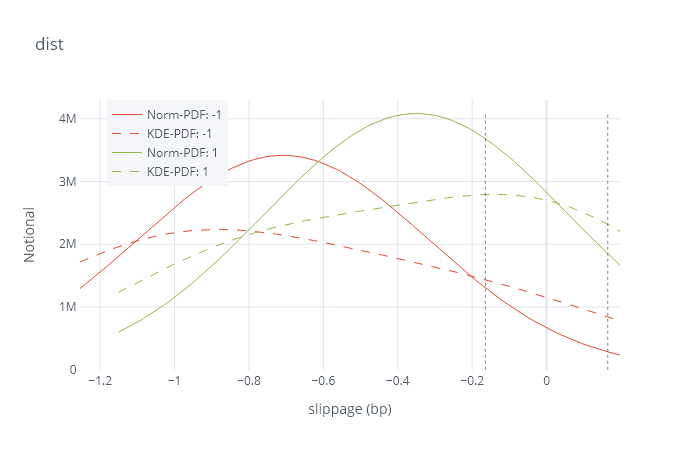

In [27]:
plot_render = PlotRender()

# Generate Plotly JSON Figure
dist_fig = plot_render.plot_dist(dist_df=dict_of_df['dist_order_df_slippage_by/pdf/side'], 
          metric='slippage', split_by='side', width=chart_width, height=chart_height)
   
# Render the Plotly JSON Figure to view
chart.plot(dist_fig, engine='plotly', style=style)

Alternatively, we can push the output into a `TCAResults` object, which can simplify the TCA output, in a much easier to use way. We can see that several charts end up getting rendered, such as timeline and distribution plots, together with more descriptive titles. We do not need to get into the low level details of how to do the plotting with Plotly, tcapy does that all for us using chartpy. However, if we want we can of course edit the returned `Plotly Figure` object (see here on do [this](https://plotly.com/python/creating-and-updating-figures)).

In [28]:
tca_results = TCAResults(dict_of_df, tca_request, chart_width=chart_width, chart_height=chart_height)
tca_results.render_computation_charts()

2020-09-15 13:40:53,334; DEBUG:tcapy.vis.displaylisteners: Plotting main timeline 2214 (displaylisteners.py:988)
2020-09-15 13:40:53,378; DEBUG:tcapy.vis.displaylisteners: Rendered plot 2214 and  (displaylisteners.py:998)
2020-09-15 13:40:53,381; DEBUG:tcapy.vis.displaylisteners: Plotting main timeline 2208 (displaylisteners.py:988)
2020-09-15 13:40:53,426; DEBUG:tcapy.vis.displaylisteners: Rendered plot 2208 and  (displaylisteners.py:998)
2020-09-15 13:40:53,463; DEBUG:tcapy.vis.displaylisteners: Plotting distribution Trades slippage by/pdf/side PDF (displaylisteners.py:1239)
2020-09-15 13:40:53,475; DEBUG:tcapy.vis.displaylisteners: Rendered distribution Trades slippage by/pdf/side PDF (displaylisteners.py:1243)
2020-09-15 13:40:53,478; DEBUG:tcapy.vis.displaylisteners: Plotting distribution Orders slippage by/pdf/side PDF (displaylisteners.py:1239)
2020-09-15 13:40:53,491; DEBUG:tcapy.vis.displaylisteners: Rendered distribution Orders slippage by/pdf/side PDF (displaylisteners.py:12

We can pickup the Plotly JSON `Figure` object ready made to push to `chartpy` for plotting.

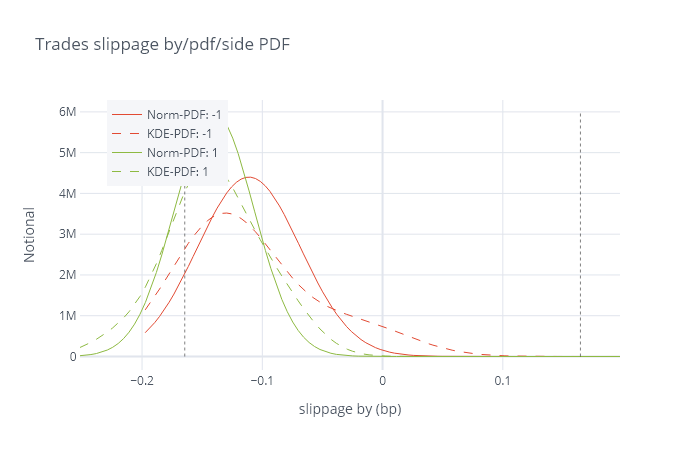

In [29]:
chart.plot(tca_results.dist_charts['trade_df_slippage_by/pdf/side'], engine='plotly', style=style)

Depending on what we have specified to be calculated in the `TCARequest` the `TCAReport` can render the following charts (which are available as attributes

* `timeline_charts` - timeline aggregates
* `sparse_market_charts` - mixture of market data with points to denote trades/orders
* `bar_charts` - average aggregates eg. average slippage
* `dist_charts` - distribution charts eg. distribution of slippage
* `scatter_charts` - scatter charts eg. plotting slippage vs. notional
* `styled_tables` - tables in HTML format

We can also get the underlying DataFrames using the following properties

* `trade_order` - DataFrames of trades/orders
* `timeline` - DataFrames of timelines
* `sparse_market` - DataFrames with a mixture of market data/trade/order data
* `bar` - DataFrames with bar chart style data
* `dist` - DataFrames with distribution style data
* `scatter` - DataFrames with scatter style data
* `table` - DataFrames intended to be displayed as tables
* `market` - DataFrames with high frequency tick market data

Let's see inside the `dist_charts` and `bar_charts` to see keys are available.

In [30]:
print(tca_results.dist_charts.keys())
print(tca_results.bar_charts.keys())

dict_keys(['trade_df_slippage_by/pdf/side', 'order_df_slippage_by/pdf/side'])
dict_keys(['trade_df_slippage_by/mean/ticker', 'trade_df_slippage_by/mean/broker_id', 'order_df_slippage_by/mean/ticker', 'order_df_slippage_by/mean/broker_id'])


Plot the average slippage by ticker! In this case, we only have one ticker, so probably just easier to report the number itself, which arount 0.5 bp.

                ticker
ticker_index          
EURUSD       -0.525355


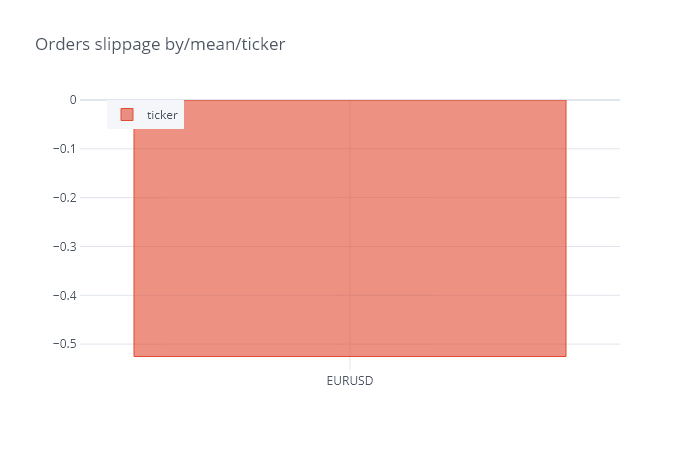

In [31]:
print(tca_results.bar['order_df_slippage_by/mean/ticker'])

chart.plot(tca_results.bar_charts['order_df_slippage_by/mean/ticker'], 
           engine='plotly', style=style)

Plot the average slippage by broker. Looks like `broker6` hasn't been particularly good!

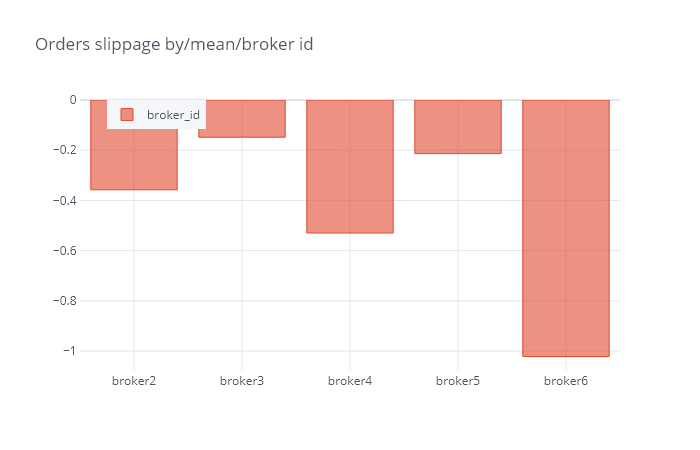

In [32]:
chart.plot(tca_results.bar_charts['order_df_slippage_by/mean/broker_id'], engine='plotly', style=style)

We can plot one of the PDF charts too.

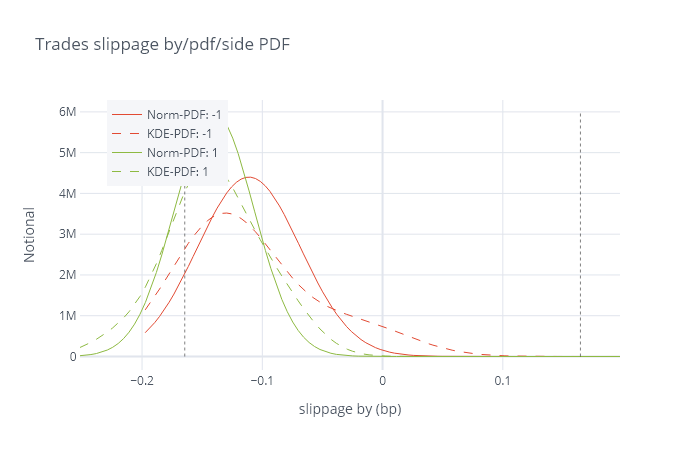

In [33]:
chart.plot(tca_results.dist_charts['trade_df_slippage_by/pdf/side'], 
           engine='plotly', style=style)

Let's try seeing what the `sparse_market_chart` property looks like.

In [34]:
print(tca_results.sparse_market_charts.keys())

dict_keys(['EURUSD_trade_df', 'EURUSD_order_df'])


We plot the market data benchmark alongside the trades as dots, sized by their executed notional and with different colors for buy (green) and sell (red).

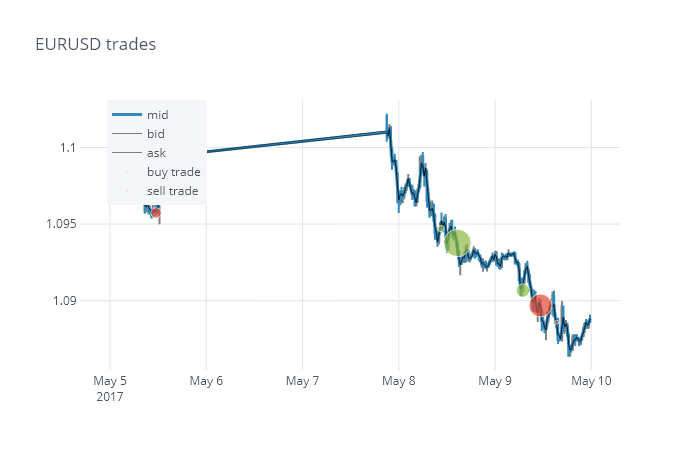

In [35]:
chart.plot(tca_results.sparse_market_charts['EURUSD_trade_df'], engine='plotly', style=style)

Because these charts are already Plotly Figure objects in JSON, we can also display them directly, without the `Chart` object.

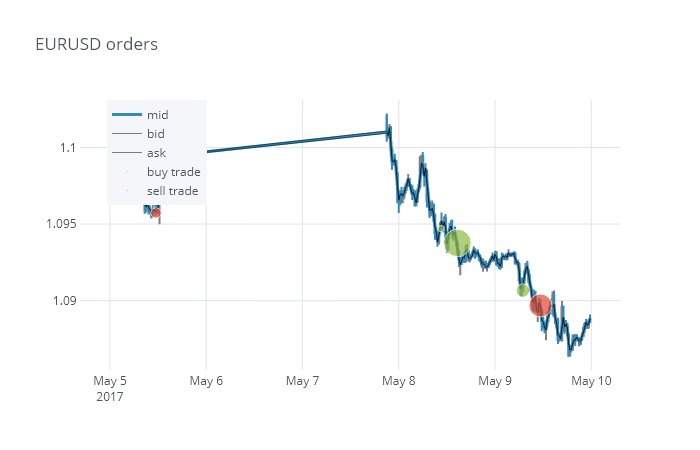

In [36]:
tca_results.sparse_market_charts['EURUSD_order_df']

If we print the charts, we can see inside the Plotly Figure JSON format.

In [37]:
print(tca_results.sparse_market_charts['EURUSD_trade_df'])

Figure({
    'data': [{'connectgaps': True,
              'line': {'color': 'rgba(0.20392156862745098, 0.5411764705882353, 0.7411764705882353, 1.0)',
                       'dash': 'solid',
                       'width': 3},
              'mode': 'lines',
              'name': 'mid',
              'text': '',
              'type': 'scatter',
              'x': [2017-05-05 00:00:00+00:00, 2017-05-05 00:20:00+00:00,
                    2017-05-05 00:40:00+00:00, ..., 2017-05-09 23:00:00+00:00,
                    2017-05-09 23:20:00+00:00, 2017-05-09 23:40:00+00:00],
              'y': array([1.0980240106582642, 1.0979187488555908, 1.0977914333343506, ...,
                          1.088395118713379, 1.088489294052124, 1.0888340473175049], dtype=object)},
             {'connectgaps': True,
              'line': {'color': 'rgba(0.0, 0.0, 0.0, 1.0)', 'dash': 'solid', 'width': 0.5},
              'mode': 'lines',
              'name': 'bid',
              'text': '',
              'type': 

We can update the properties of a Plotly figure too, such as the title, without having to redraw the whole chart.

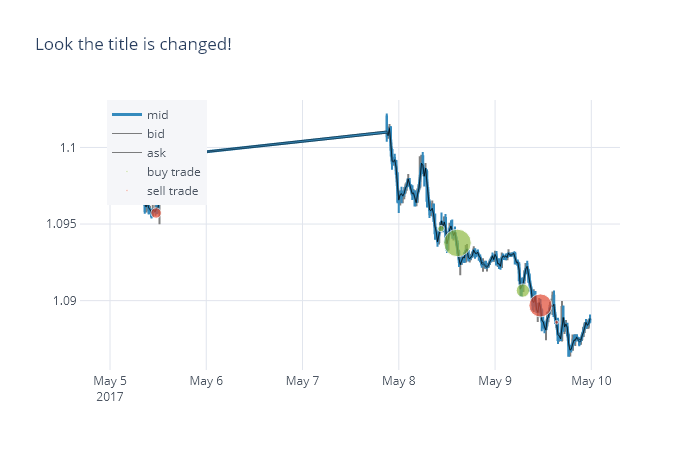

In [38]:
trade_fig = tca_results.sparse_market_charts['EURUSD_trade_df']
trade_fig.update_layout(title='Look the title is changed!')

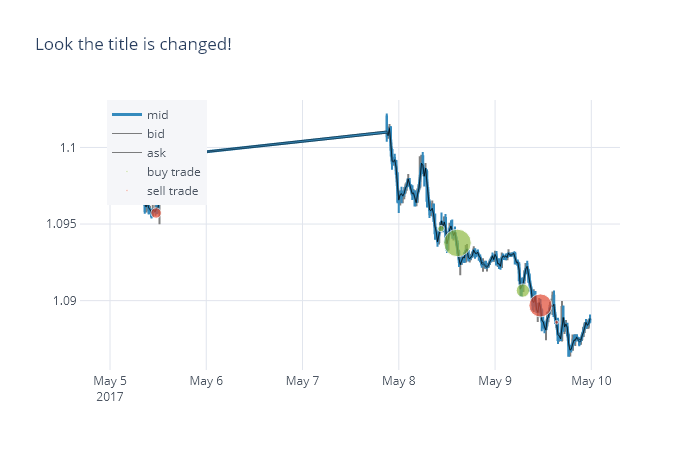

In [39]:
trade_fig

### Turning off all caching

Even if we have `use_multithreading=False` as a parameter it is likely that we'll end up doing using some caching Redis. 

We can turn off all caching entirely if we want by setting the below parameters in `multithreading_params`. If we just want to make a limited query of external market data this might be a good approach. In practive, we would recommend enabling both caching (in Redis), that reduces unneccessary downloading of market data and also `use_multithreading` to take advantage of parallel computation using Celery, which we'll discuss later.

In [40]:
%%time

tca_request.multithreading_params = \
{   # True or False
    'splice_request_by_dates': False,  
 
    # Length of cache period
    'cache_period': 'day',  

    # Cache trade data in monthly/periodic chunks in Redis
    'cache_period_trade_data': False,

    # Cache market data in monthly/periodic chunks in Redis
    'cache_period_market_data': False, 

    # Return trade data internally as handles (usually necessary for Celery)
    'return_cache_handles_trade_data': False, 

    # Return market data internally as handles (usually necessary for Celery)
    'return_cache_handles_market_data': False, 

    # Use single threading   
    'parallel_library': 'single'                         
}

# Dictionary of (mostly) dataframes as output from TCA calculation
dict_of_df = tca_engine.calculate_tca(tca_request)

2020-09-15 13:40:54,591; INFO:tcapy.analysis.tcaengine: More than 1 ticker specified for TCA detailed computation. Only working on first (tcaengine.py:122)
2020-09-15 13:40:54,592; DEBUG:tcapy.analysis.tcamarkettradeloader: Start loading trade/data/computation (tcamarkettradeloader.py:241)
2020-09-15 13:40:54,593; DEBUG:tcapy.analysis.tcatickerloaderimpl: Get market and trade/order data for EURUSD from 2017-05-05 00:00:00+00:00 - 2017-05-10 00:00:00+00:00 (tcatickerloaderimpl.py:80)
2020-09-15 13:40:54,595; DEBUG:tcapy.data.databasesource: Downloading 2017-05-05 00:00:00 - 2017-05-10 00:00:00 for EURUSD (databasesource.py:3816)
2020-09-15 13:41:02,782; WARNING:tcapy.analysis.algos.benchmark: mid not in market data (benchmark.py:90)
2020-09-15 13:41:02,783; DEBUG:tcapy.analysis.tcatickerloader: Get trade order holder for EURUSD from 2017-05-05 00:00:00+00:00 - 2017-05-10 00:00:00+00:00 (tcatickerloader.py:386)
2020-09-15 13:41:02,818; WARNING:tcapy.data.datafactory: Dataframe empty for 

Wall time: 24.9 s


Let's see what's in the output.

In [41]:
dict_of_df.keys()

odict_keys(['trade_df', 'order_df', 'sparse_market_trade_df', 'sparse_market_order_df', 'market_df_downsampled', 'candlestick_fig', 'dist_trade_df_slippage_by/pdf/side', 'bar_trade_df_slippage_by/mean/ticker', 'bar_trade_df_slippage_by/mean/broker_id', 'dist_order_df_slippage_by/pdf/side', 'bar_order_df_slippage_by/mean/ticker', 'bar_order_df_slippage_by/mean/broker_id', 'market_df'])

## Aggregated computation - Celery and using market data from database

Let's say we want to compute several crosses? We can do that by changing the `tca_type` to `aggregated`. 

We'll also change our data source to use our (already populated) Arctic/MongoDB database which has Dukascopy data. 

There is a `DatabasePopulator` class which helps us to populate databases. We'll also change `use_multithreading` to `True`, so we can use Celery, and hence different workers will be used for each currency pair to compute various metrics and benchmarks. Then the original process will do the final calculations, which are typically much less onerous (such as creating aggregated statistics).

Underneath the caching when setting `use_multithreading` to `True` also becomes complicated (eg. into `month` or `week` or `day` chunks), so we might end up trying to get more data than needed, before truncating. This means that when we hit the cache again with slightly different dates, it is still likely we'll be able to get data. If you are using an external source, `monthly` could end up making your very first call quite slow. 

A few points about Celery

* Redis as a message broker between the client and the Celery worker
* Memcached as a result backend once the Celery worker has finished
* If you use Redis for both, you can often encounter race conditions
* Memcached should be used with `python-memcached` to manage communication between Celery and Memcached as `pylibmc` is not thread-safe
* If you have more powerful hardware, you can increase the number of Celery workers in `restart_tcapy.py`

Typically, we'd recommend using `day` and this is the default, as it enables tcapy to make many calls at once to fetch the data either from the cache or database, rather than blocking for a long time grabbing large periods of data. Furthermore, it parallelizes the various serialisation/deserialisation from the cache. At the same time, making the chunks very small (eg. hour) seemed to result in too much overhead related to the parallisation process. You have to be careful though that you are not overloading your database with too many calls.

We can also split up computation by date, not only the loading/caching data, but this can impact the final results if orders go across boundaries (eg. across daily boundaries). Furthermore, in our testing it wasn't clear if there was any noticable improvement in speed. Most of the time of the calculation was typically spend loading market/trade/order data, hence, why the caching of this data and also the splitting up of these data requests, seemed to have a reasonable impact.

We have chosen a much larger window in this case, nearly 2 months of data.

*Note, at the current time that directly downloading for Dukascopy should only be done when `use_multithreading=False` as the implementation currently not thread-safe when it comes to downloading multiple tickers*

In [15]:
tca_request = TCARequest(
    start_date='24 Apr 2017', 
    finish_date='02 Jun 2017', 
    ticker=['EURUSD', 'USDJPY'],
    tca_type='aggregated',
    trade_data_store='csv', market_data_store='arctic-dukascopy',
    trade_order_mapping=remote_csv_trade_order_mapping,
    metric_calcs=[MetricSlippage(), MetricTransientMarketImpact(
        transient_market_impact_gap={'5' : 's'})],
    results_form=[BarResultsForm(metric_name='slippage', 
        aggregate_by_field='ticker', scalar=10000.0)],
    benchmark_calcs=[BenchmarkMarketSpreadToMid()],
    use_multithreading=True)

### Comparing speed between parallel and single threaded 

The log output will appear to be less, because most of it will now be in the `celery.log` file, generated by the various workers. It'll take around 12 seconds on my machine, with the cache emptied.

In [16]:
%%time

volatile_cache.clear_cache()

# Dictionary of (mostly) dataframes as output from TCA calculation
dict_of_df = tca_engine.calculate_tca(tca_request)

2020-09-15 14:44:34,563; DEBUG:tcapy.analysis.tcamarkettradeloader: Start loading trade/data/computation (tcamarkettradeloader.py:241)
2020-09-15 14:44:34,567; DEBUG:tcapy.analysis.tcamarkettradeloaderimpl: Split TCA request for EURUSD dates  / 2017-04-24 00:00:00+00:00 to 2017-04-24 23:59:59.999999+00:00 / 2017-04-25 00:00:00+00:00 to 2017-04-25 23:59:59.999999+00:00 / 2017-04-26 00:00:00+00:00 to 2017-04-26 23:59:59.999999+00:00 / 2017-04-27 00:00:00+00:00 to 2017-04-27 23:59:59.999999+00:00 / 2017-04-28 00:00:00+00:00 to 2017-04-28 23:59:59.999999+00:00 / 2017-04-29 00:00:00+00:00 to 2017-04-29 23:59:59.999999+00:00 / 2017-04-30 00:00:00+00:00 to 2017-04-30 23:59:59.999999+00:00 / 2017-05-01 00:00:00+00:00 to 2017-05-01 23:59:59.999999+00:00 / 2017-05-02 00:00:00+00:00 to 2017-05-02 23:59:59.999999+00:00 / 2017-05-03 00:00:00+00:00 to 2017-05-03 23:59:59.999999+00:00 / 2017-05-04 00:00:00+00:00 to 2017-05-04 23:59:59.999999+00:00 / 2017-05-05 00:00:00+00:00 to 2017-05-05 23:59:59.99

Wall time: 12.5 s


If we empty the cache, and turn off multithreading on my machine it takes around 7 seconds. It isn't always the case that multi threading is going to be faster for small date windows.

In [17]:
volatile_cache.clear_cache()

In [18]:
%%time
volatile_cache.clear_cache()

tca_request.use_multithreading = False
tca_request.trade_order_mapping=local_csv_trade_order_mapping

# Dictionary of (mostly) dataframes as output from TCA calculation
dict_of_df = tca_engine.calculate_tca(tca_request)

2020-09-15 14:44:49,367; DEBUG:tcapy.analysis.tcamarkettradeloader: Start loading trade/data/computation (tcamarkettradeloader.py:241)
2020-09-15 14:44:49,369; DEBUG:tcapy.analysis.tcatickerloaderimpl: Get market and trade/order data for EURUSD from 2017-04-24 00:00:00+00:00 - 2017-06-02 00:00:00+00:00 (tcatickerloaderimpl.py:80)
2020-09-15 14:44:49,370; DEBUG:tcapy.data.volatilecache: Attempting to get list from cache: ['arctic-dukascopy_EURUSD_2017-04-24 00:00:00+00:00_2017-06-02 00:00:00+00:00_market_df_None_comp'] (volatilecache.py:540)
2020-09-15 14:44:49,372; DEBUG:tcapy.data.volatilecache: Attempting to get list from cache: ['arctic-dukascopy_EURUSD_2017-04-24 00:00:00+00:00_2017-06-02 00:00:00+00:00_market_df_None_comp'] (volatilecache.py:540)
2020-09-15 14:44:49,432; INFO:tcapy.data.databasesource: Attempting to load Arctic/MongoDB library: market_data_table CHUNK_STORE (databasesource.py:1999)
2020-09-15 14:44:49,435; INFO:tcapy.data.databasesource: Got Arctic/MongoDB library

2020-09-15 14:44:53,634; INFO:tcapy.data.databasesource: Got Arctic/MongoDB library: market_data_table CHUNK_STORE (databasesource.py:2019)
2020-09-15 14:44:54,334; DEBUG:tcapy.data.databasesource: Extracted Arctic/MongoDB library: market_data_table for ticker USDJPY-dukascopy between 2017-04-24 00:00:00 - 2017-06-02 00:00:00 from CHUNK_STORE (databasesource.py:2080)
2020-09-15 14:44:54,408; WARNING:tcapy.analysis.algos.benchmark: mid not in market data (benchmark.py:90)
2020-09-15 14:44:54,409; DEBUG:tcapy.analysis.tcatickerloader: Get trade order holder for USDJPY from 2017-04-24 00:00:00+00:00 - 2017-06-02 00:00:00+00:00 (tcatickerloader.py:386)
2020-09-15 14:44:54,452; DEBUG:tcapy.data.volatilecache: Attempting to get list from cache: ['arctic-dukascopy_JPYUSD_2017-04-24 00:00:00+00:00_2017-06-02 00:00:00+00:00_market_df_None_comp'] (volatilecache.py:540)
2020-09-15 14:44:54,455; DEBUG:tcapy.data.volatilecache: Attempting to get list from cache: ['arctic-dukascopy_USDJPY_2017-04-24

Wall time: 7.16 s


Let's run it with multithreading on again, but this time the machine data should be cached in Redis. We see a small improvement here. If we are accessing a remote database, then the speed up would be much more significant.

In [19]:
%%time
tca_request.use_multithreading = True
tca_request.trade_order_mapping=remote_csv_trade_order_mapping

# Dictionary of (mostly) dataframes as output from TCA calculation
dict_of_df = tca_engine.calculate_tca(tca_request)

2020-09-15 14:44:59,402; DEBUG:tcapy.analysis.tcamarkettradeloader: Start loading trade/data/computation (tcamarkettradeloader.py:241)
2020-09-15 14:44:59,405; DEBUG:tcapy.analysis.tcamarkettradeloaderimpl: Split TCA request for EURUSD dates  / 2017-04-24 00:00:00+00:00 to 2017-04-24 23:59:59.999999+00:00 / 2017-04-25 00:00:00+00:00 to 2017-04-25 23:59:59.999999+00:00 / 2017-04-26 00:00:00+00:00 to 2017-04-26 23:59:59.999999+00:00 / 2017-04-27 00:00:00+00:00 to 2017-04-27 23:59:59.999999+00:00 / 2017-04-28 00:00:00+00:00 to 2017-04-28 23:59:59.999999+00:00 / 2017-04-29 00:00:00+00:00 to 2017-04-29 23:59:59.999999+00:00 / 2017-04-30 00:00:00+00:00 to 2017-04-30 23:59:59.999999+00:00 / 2017-05-01 00:00:00+00:00 to 2017-05-01 23:59:59.999999+00:00 / 2017-05-02 00:00:00+00:00 to 2017-05-02 23:59:59.999999+00:00 / 2017-05-03 00:00:00+00:00 to 2017-05-03 23:59:59.999999+00:00 / 2017-05-04 00:00:00+00:00 to 2017-05-04 23:59:59.999999+00:00 / 2017-05-05 00:00:00+00:00 to 2017-05-05 23:59:59.99

Wall time: 7.29 s


### Using CacheHandle object

Throughout the parallelization process, `CacheHandle` objects are used extensively. Returning very large objects via Celery can cause problems, because of pickling/depickling. Rather than doing that, we instead create `CacheHandle` objects which are like pointers that point to keys in Redis, where the large DataFrames might be stored (sometimes in chunks given the limits on size of Redis values). The process is easier to control this way. Where possible we try to avoid serialisation/deserialisation of `CacheHandle` objects, until they're needed. Compression on these Redis values is enabled by default, so your RAM is not overwhelmed. In practice, you might to adjust your `redis.conf` settings to manage the store, depending on how much RAM is on your machine.

### Output of an aggregated TCA computation

Let's check out the output. As an aggregated computation, we don't have the sparse market/trade DataFrames any more.

In [20]:
dict_of_df.keys()

odict_keys(['trade_df', 'order_df', 'bar_trade_df_slippage_by/mean/ticker', 'bar_order_df_slippage_by/mean/ticker', 'EURUSD_df', 'USDJPY_df'])

If we want to have all those nice extra DataFrames, we need to set the `summary_display` parameter, and rerun the computation.

In [21]:
tca_request.summary_display = 'candlestick'

# Dictionary of (mostly) dataframes as output from TCA calculation
dict_of_df = tca_engine.calculate_tca(tca_request)

2020-09-15 14:45:07,725; DEBUG:tcapy.analysis.tcamarkettradeloader: Start loading trade/data/computation (tcamarkettradeloader.py:241)
2020-09-15 14:45:07,728; DEBUG:tcapy.analysis.tcamarkettradeloaderimpl: Split TCA request for EURUSD dates  / 2017-04-24 00:00:00+00:00 to 2017-04-24 23:59:59.999999+00:00 / 2017-04-25 00:00:00+00:00 to 2017-04-25 23:59:59.999999+00:00 / 2017-04-26 00:00:00+00:00 to 2017-04-26 23:59:59.999999+00:00 / 2017-04-27 00:00:00+00:00 to 2017-04-27 23:59:59.999999+00:00 / 2017-04-28 00:00:00+00:00 to 2017-04-28 23:59:59.999999+00:00 / 2017-04-29 00:00:00+00:00 to 2017-04-29 23:59:59.999999+00:00 / 2017-04-30 00:00:00+00:00 to 2017-04-30 23:59:59.999999+00:00 / 2017-05-01 00:00:00+00:00 to 2017-05-01 23:59:59.999999+00:00 / 2017-05-02 00:00:00+00:00 to 2017-05-02 23:59:59.999999+00:00 / 2017-05-03 00:00:00+00:00 to 2017-05-03 23:59:59.999999+00:00 / 2017-05-04 00:00:00+00:00 to 2017-05-04 23:59:59.999999+00:00 / 2017-05-05 00:00:00+00:00 to 2017-05-05 23:59:59.99

2020-09-15 14:45:16,005; DEBUG:tcapy.data.volatilecache: Deleted 1 keys (volatilecache.py:576)
2020-09-15 14:45:16,028; DEBUG:tcapy.data.volatilecache: Attempting to get list from cache: ['2020-09-15 13:45:11.108315__fig_comp_75697_expiry_'] (volatilecache.py:540)
2020-09-15 14:45:16,033; DEBUG:tcapy.data.volatilecache: Deleted 1 keys (volatilecache.py:576)
2020-09-15 14:45:16,075; DEBUG:tcapy.data.volatilecache: Attempting to get list from cache: ['2020-09-15 13:45:11.108343__fig_comp_59187_expiry_'] (volatilecache.py:540)
2020-09-15 14:45:16,080; DEBUG:tcapy.data.volatilecache: Deleted 1 keys (volatilecache.py:576)
2020-09-15 14:45:16,122; DEBUG:tcapy.data.volatilecache: Attempting to get list from cache: ['2020-09-15 13:45:13.542625__df_comp_79533_expiry_'] (volatilecache.py:540)
2020-09-15 14:45:16,125; DEBUG:tcapy.data.volatilecache: Deleted 1 keys (volatilecache.py:576)
2020-09-15 14:45:16,129; DEBUG:tcapy.data.volatilecache: Attempting to get list from cache: ['2020-09-15 13:45:

If we inspect all the keys of the TCA output, we now see a lot more DataFrames and Plotly JSON Figures.

In [ ]:
dict_of_df.keys()

At present `TCAResults` doesn't yet support `aggregate` TCA with more than one ticker. So we need to use `PlotRender` to create the various figures from the DataFrames. Here let's plot the order slippage by the ticker.

In [ ]:
plot_render = PlotRender()

# Generate Plotly JSON Figure
bar_fig = plot_render.plot_bar(title='Order slippage by ticker', 
              bar_df=dict_of_df['bar_order_df_slippage_by/mean/ticker'], 
              width=chart_width, height=chart_height)
   
# Render the Plotly JSON Figure to view
chart.plot(bar_fig, engine='plotly', style=style)

We can plot the sparse market/order data for both EURUSD and USDJPY.

In [ ]:
chart.plot(dict_of_df['EURUSD_sparse_market_order_fig'], engine='plotly', style=style)

In [ ]:
chart.plot(dict_of_df['USDJPY_sparse_market_order_fig'], engine='plotly', style=style)

### Using trade/order data from an internal database

We can also collect trade/order data in internal databases (Microsoft SQL Server, MySQL or PostgreSQL). Here we are using an already populated MySQL, which has trade and order data in different tables, that we have mapped in `Constants`. The call takes around 8 seconds on my machine. At this stage, the market data has been cached from the earlier call, but the trade/order data needs to be loaded from MySQL. Underneath it will use `DatabaseSourcMySQL` to do the actual SQL calls to the database.

Typically, we would expect that most calls would involve both internal trade data and market data databases.

In [ ]:
%%time
tca_request.trade_data_store = 'mysql'
tca_request.trade_order_mapping = ['trade_df', 'order_df']

# Dictionary of (mostly) dataframes as output from TCA calculation
dict_of_df = tca_engine.calculate_tca(tca_request)

If we run it again, it takes around 5 seconds on my machine. In this case the reading the cached trade/order data from Redis (as well as the market data, which was cached earlier) has helped a bit. For longer time periods we would likely notice that caching would help.

In [ ]:
%%time

# Dictionary of (mostly) dataframes as output from TCA calculation
dict_of_df = tca_engine.calculate_tca(tca_request)

We can see the output keys below.

In [ ]:
dict_of_df.keys()

We can view some of the market data in returned which was stored in the database.

In [ ]:
dict_of_df['EURUSD_df'].head(5)

Let's render the sparse market/order Plotly JSON Figure, which was returned for USDJPY.

In [ ]:
chart.plot(dict_of_df['USDJPY_sparse_market_order_fig'], 
           engine='plotly', style=style)

# How to speed up tcapy?

We go through a few ways of how to speed up tcapy below.

* Increase the number of Celery workers
    * Given tcapy distributes the computation, if you have more workers, you should be able to speed up computation considerably
    * This is particuarly useful if you are running the computation across many tickers
    
* Have faster hard drives and more memory
    * Faster hard drives will speed up your database
    * More memory will enable Redis to cache more data in-memory, rather than having to hit the database every time

* Code profiling
    * If you use a tool like PyCharm it has an easy to use code profile, which gives you a breakdown of how long each section of code takes to run
    * Whilst, we have used this extensively, to identify bottlenecks in the tcapy code, I'm sure we could improve the code and make it faster
    * If you find anything that makes the code a lot quicker, let us know
    
* Tune database performance
    * We have just out-of-the-box configurations for our databases (Arctic/MongoDB and Microsoft SQL Server)
    * It is likely we can improve performance of these by tuning the configuration
    * You can also experiment with different storage engines for Arctic, we found that for example switching to `ChunkStore` with daily buckets, seemed to be faster for our use case than `VersionStore`
    * For example with MongoDB, we can improve performance via [sharding](https://docs.mongodb.com/manual/sharding/), which allows us to distribute the database across multiple machines

# Running tcapy on the cloud

Given that TCA is heavily compute intensive and also requires a lot of storage, it would be a good task to run in the cloud to take advantage of scaling computations. In particular, tcapy has been written with distributed computation in mind, so it can be speeded up considerably by having hardware that can run many tasks in parallel (eg. through the use of Celery to run tasks on different workers). Running tcapy with hardware which only has eg. 1-2 cores, is likely to likely to result in very slow computation.

It is possible to replicate a local setup by spinning up a Linux box in the cloud (eg. [AWS EC2](https://aws.amazon.com/ec2/), [GCP Compute Engine](https://cloud.google.com/compute) or [Azure Virtual Machines](https://azure.microsoft.com/en-gb/services/virtual-machines/)), which would mirror the configuration exactly and you would self manage everything including the database.

However, a more efficient way to use the cloud, would be to use specific fully managed cloud services. For illustative purposes, we've listed some of the fully managed cloud services, that could be using for different parts of tcapy on Amazon Web Services (AWS) and Google Cloud Platform (GCP).

This is only a summarised list, and there are likely to be many other cloud services which are likely to be useful. We can split it roughly into 3 categories. Firstly, services related to the TCA computation and running of the web app. Secondly, we list about those services for managing and storing the underlying data, both the market tick data and also the trade/order data. Thirdly, are the services for caching the data and also to manage communication between the distributed processes.

* *Computation*
    * serverless hosting of tcapy web application and service
        * deals with capacity provisioning, load balancing, auto-scaling to application health monitoring
        * [AWS Elastic Beanstalk](https://aws.amazon.com/elasticbeanstalk/)
        * [GCP App Engine](https://cloud.google.com/appengine)
        * [Azure App Service](https://azure.microsoft.com/en-gb/services/app-service/)
    * serverless compute for TCA calculations
        * run code without provisioning or managing servers, pay as go model
        * [AWS Lambda](https://aws.amazon.com/lambda/)
        * [GCP Cloud Functions](https://cloud.google.com/functions)
        * [Azure functions](https://azure.microsoft.com/en-gb/services/functions/)
* *Data storage*
    * storing market data in a database
        * [AWS DocumentDB (mostly compatible with MongoDB)](https://aws.amazon.com/documentdb/)
        * [GCP MongoDB Atlas](https://www.mongodb.com/cloud/atlas/mongodb-google-cloud)
        * [GCP BigQuery](https://cloud.google.com/bigquery)
        * [Azure Cosmos DB](https://azure.microsoft.com/en-gb/services/cosmos-db/)
    * storing market data in shorter term disk storage
        * [AWS EBS](https://aws.amazon.com/ebs/)
        * [GCP Cloud Storage](https://cloud.google.com/storage)
        * [Azure Disk Storage](https://azure.microsoft.com/en-gb/services/storage/disks/)
    * storing market data in longer term disk storage
        * [AWS S3](https://aws.amazon.com/s3/)
        * [GCP Cloud Storage buckets](https://cloud.google.com/compute/docs/disks#gcsbuckets)
        * [Azure Blob storage](https://docs.microsoft.com/en-us/azure/storage/blobs/storage-blobs-introduction)
    * storing trade data in a database
        * [AWS RDS](https://aws.amazon.com/rds/)
        * [GCP Cloud SQL](https://cloud.google.com/sql)
        * [Azure SQL Database](https://azure.microsoft.com/en-gb/services/sql-database/)
* *In-memory caching and managing distributed processes*
    * caching market and trade data
        * [AWS ElasticCache for Redis](https://aws.amazon.com/elasticache/)
        * [GCP Memorystore](https://cloud.google.com/memorystore)
        * [Azure Cache for Redis](https://azure.microsoft.com/en-gb/services/cache/)
    * message broker
        * [AWS SQS](https://aws.amazon.com/sqs/)
        * [GCP Cloud Pub/Sub](https://cloud.google.com/pubsub)
        * [Azure Queue Storage](https://azure.microsoft.com/services/storage/queues/)

At present, tcapy doesn't natively take advantage of many of these serverless cloud services. You would need to write your own wrappers to use lots of these serverless cloud features, in particular . The benefits of serverless computing are that we could massively scale the computation on demand, making it much quicker. It is likely to be cheaper in terms of computation costs, since we'll only pay for the computations on demand, rather than continually renting a powerful Linux box.

**However, we are hoping to add proper support for such serverless cloud functionality for several cloud providers (if you have interest in helping us on this, let us know).**

# Troubleshooting tcapy

There are many potentional reasons why there could be issues with tcapy. Note that if you use Docker to start tcapy it might be easier, and some of these folders could be different.

* Are the databases/caches accessible and have we set the right IPs/credientials for them? 
    * Wrong IPs will obviously cause problems
    * Firewalls can frequently block access
* Does the parallelisation work with Celery? 
    * Perhaps, you have got too many workers for your hardware
    * Have you started your Celery workers (using `restart_tcapy.sh`) - this will automatically be started if you use Docker version
* Have you setup your databases properly?
    * Have they started?
    * Are they populated?
* Is the trade/order data in the right format? 
    * If all the field names are different, tcapy will have trouble reading them
* Is the market data actually there, or are there big chunks missing?
    * If there's missing market data for a period of time where you want to do TCA on your trades, it will cause problems

The first place to check are in the logs in folder `/home/tcapyuser/cuemacro/tcapy/log`

* tcapy application - `linux*.log` and `windows*.log`
    * This is the most important place to start
* Parallelisation - `celery.log`
    * When TCA computation gets farmed out per cross, the log data is dumped here
* Web server - `gunicorn_tcapy_error.log` and `gunicorn_tcapy_error.log`
    * Check who is accessing the web server
* Database - `mongo.log`
    * Check whether the database is getting connections
    
Also try to look at the underlying data, by dumping it in CSV format, to see if there are any missing sections etc.
    
Whilst we can use Linux tools like `tail -f` and `less` to read logs, a nice log GUI available for both Linux and Windows is [glogg](https://glogg.bonnefon.org/).
    
Check the GitHub page for community support too if you have any issues. Cuemacro also offers commercial support for tcapy, contact saeed@cuemacro.com for more information.

# Extra coding examples with tcapy

If you want to see more code examples of how to call tcapy programmatically, the `/home/tcapyuser/cuemacro/tcapy/tcapy_examples` folder has several Python scripts to illustate how to call tcapy. We are also working on more Jupyter notebooks to illustrate how to use other elements of the tcapy API.

# Conclusion

We have seen how to call tcapy programatically. We showed how to download data from Dukascopy and also how to get trade data from CSV files. We indicated what the format of your trade/order data should be.

We described how to do a TCA calculation with tcapy, and how to specify which metrics and benchmarks to use, as well as aggregating the statistics into timelines, distributions etc.

We have also seen how using Celery to distribute the computation, as well as caching data with Redis can help to speed up the computation. If you are interesting supporting this project, please contact saeed@cuemacro.com.